In [28]:
import CrawlStock
import lstm
import pandas as pd
pd.DataFrame


CrawlStock.DailyUpdate()
Stock_ID = ['2330','2002','3008','2332','1560','2317','3481','2409']
CrawlID = CrawlStock.CheckCSV(Stock_ID)
CrawlStock.Get_Stock_DATA(Stock_ID = CrawlID)

['2002.csv', '2317.csv', '2330.csv', '2332.csv', '2409.csv', '3008.csv', '3481.csv']
Update...
2002
From 2017/07/22 to 2017/07/21 (Today)
2317
From 2017/07/22 to 2017/07/21 (Today)
2330
From 2017/07/22 to 2017/07/21 (Today)
2332
From 2017/07/22 to 2017/07/21 (Today)
2409
From 2017/07/22 to 2017/07/21 (Today)
3008
From 2017/07/22 to 2017/07/21 (Today)
3481
From 2017/07/22 to 2017/07/21 (Today)
Crawl [] Stock Data
Nothing to crawl


In [1]:
import pandas as pd
import lstm
import time
import keras
import numpy as np

ColumnList = ["成交股數","成交金額","成交筆數","開盤價","最後揭示買價","最後揭示賣價","收盤價"]

global_start_time = time.time()
PredictInformation = pd.read_pickle("../predict/PredictInformation.pickle")

for i in range(len(PredictInformation)):
    forloop_start_time = time.time()
    #
    FileName = PredictInformation['FileName'][i]
    WindowSize = PredictInformation['WindowSize'][i]
    NumOfPredictDay = PredictInformation['NumOfPredictDay'][i]
    PredictCSVName = PredictInformation['PredictCSVName'][i]
    #載入資料
    DataSet = lstm.LoadData(FileName, ColumnList, WindowSize, NumOfPredictDay)
    #正規化資料
    NormalizeData = lstm.NormaliseWindows(DataSet)
    #切割預測資料
    x_predict = lstm.SplitDatatoPredict(DataSet, ColumnList, NumOfPredictDay)
    x_predict = lstm.NormaliseWindows(x_predict)
    
    model = keras.models.load_model("../model/" + str(i) + '.h5')
    
    predictions = lstm.predict_point_by_point(model, x_predict)

    #lstm.plot_predict(predictions, NumOfPredictDay, x_predict)
    
    x_predict = np.reshape(x_predict, (x_predict.shape[1], x_predict.shape[2]))
    x_predict = x_predict[:,-1:]

    StoreData = pd.DataFrame(columns=['Data'], index=range(len(predictions) + len(x_predict)))
    for i in range(len(StoreData)):
        if i < len(x_predict):
            StoreData.iloc[i] = x_predict[i]
        else:
            StoreData.iloc[i] = predictions[i - len(x_predict)]
            
    StoreData.to_csv('../predict/' + PredictCSVName)
    print('Predict duration (s) : ',time.time() - forloop_start_time)

print('Total predict duration (s) : ',time.time() - global_start_time)

Using TensorFlow backend.


(1, 50, 7)
Predict duration (s) :  7.307945966720581
(1, 50, 7)
Predict duration (s) :  8.858883142471313
(1, 50, 7)
Predict duration (s) :  8.718410968780518
(1, 50, 7)
Predict duration (s) :  9.885443210601807
(1, 100, 7)
Predict duration (s) :  11.074356079101562
(1, 100, 7)
Predict duration (s) :  11.900482892990112
(1, 100, 7)
Predict duration (s) :  12.195911884307861
(1, 100, 7)
Predict duration (s) :  12.758006811141968
(1, 150, 7)
Predict duration (s) :  14.470983028411865
(1, 150, 7)
Predict duration (s) :  16.706856966018677
(1, 150, 7)
Predict duration (s) :  16.554933071136475
(1, 150, 7)
Predict duration (s) :  16.868462085723877
(1, 50, 7)
Predict duration (s) :  13.535731077194214
(1, 50, 7)
Predict duration (s) :  15.181950807571411
(1, 50, 7)
Predict duration (s) :  16.952417135238647
(1, 50, 7)
Predict duration (s) :  17.640242338180542
(1, 100, 7)
Predict duration (s) :  20.179006099700928
(1, 100, 7)
Predict duration (s) :  18.708335876464844
(1, 100, 7)
Predict du

(3028, 50, 7)
(3028, 3)
(1, 50, 7)
(3, 1)


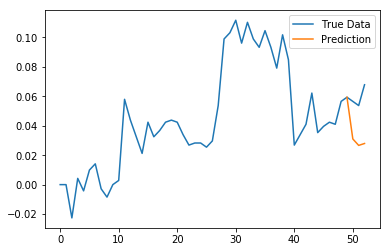

In [36]:
x_train, y_train, x_test, y_test = lstm.SplitDatatoTest(NormalizeData, ColumnList, NumOfPredictDay)
#預測
predictions = lstm.predict_point_by_point(model, x_test)
lstm.plot_predict(predictions, NumOfPredictDay, x_test, y_test)

In [ ]:
import pandas as pd
import time

FilenameList = "2002.csv"
#ColumnList = []
#WindowSizeList = [50,100,150]
WindowSizeList = 150
#NumOfPredictDayList = [3,7,10,30]
NumOfPredictDayList = 30
#Layer = []
#Loss = []
#Optimizer = []
#BatchSize = []
EpochList = [10]
#ValidationSplit = []

def predict(FilenameList,WindowSizeList,NumOfPredictDayList):
    #
    start_time = time.time()
    
    ModelInformation = pd.read_pickle('../model/ModelInformation.pickle')
    for i in range(len(ModelInformation)):
        if ModelInformation['FileName'][i] == FilenameList:
            if ModelInformation['WindowSize'][i] == WindowSizeList:
                if ModelInformation['NumOfPredictDay'][i] == NumOfPredictDayList:
                    #
                    print('Search duration (s) : ',time.time() - start_time)
                    
                    return ModelInformation['ModelName'][i]

    
ModelName = predict(FilenameList,WindowSizeList,NumOfPredictDayList)
ModelName
forloop_start_time = time.time()
#model = keras.models.load_model("../model/" + ModelName)
print('Load duration (s) : ',time.time() - forloop_start_time)